# 入门实例-线性回归模型

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 打印torch版本
torch.__version__

'2.2.2'

In [2]:
# 使用pandas读取csv文件
data = pd.read_csv('./dataset/Income.csv')
# 打印数据的前5行
data.head()
# 打印完整数据
# data

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


In [3]:
# 打印数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


Text(0, 0.5, 'Income')

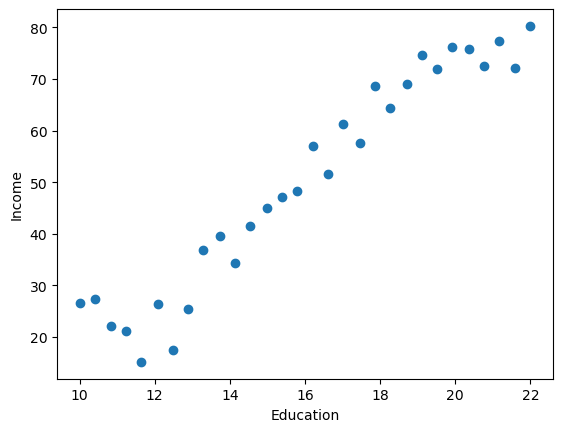

In [4]:
# 绘制数据集的散点图
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')

In [5]:
# 将数据转换为张量（Tensor）
X = torch.from_numpy(data.Education.values.reshape(-1, 1)).type(torch.FloatTensor)
Y = torch.from_numpy(data.Income.values.reshape(-1, 1)).type(torch.FloatTensor)
# 打印张量的形状
X.shape, Y.shape

(torch.Size([30, 1]), torch.Size([30, 1]))

## 使用nn框架

In [6]:
from torch import nn
# 定义线性回归模型 y = w * x + b
# 必须继承nn.Module类
class LinearRegression(nn.Module):
    # 初始化模型
    def __init__(self):
        # 调用父类的初始化方法，继承父类的属性
        super(LinearRegression, self).__init__()
        # 定义线性模型 y = w * x + b
        # 初始化linear为一个线性层，输入长度为1，输出长度为1
        self.linear = nn.Linear(1, 1)
    # 定义前向传播，self为类的实例，input为输入数据（即x）
    def forward(self, input):
        # 返回模型的输出
        return self.linear(input)

In [7]:
# 实例化模型
model = LinearRegression()
model
# bias：偏置
# 或者直接使用model = nn.Linear(1, 1)，不用自定义模型

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [8]:
# 定义损失函数
loss_fn = nn.MSELoss() # 均方误差
# loss_fn?

In [9]:
# 定义优化器
# 使用随机梯度下降优化器(SGD)
# model.parameters()：模型的参数, lr：学习率
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [10]:
# 训练模型，迭代5000次
for epoch in range(5000):
    for x, y in zip(X, Y):
        # 前向传播，计算模型输出
        y_pred = model(x)
        # 计算损失，即真实值与预测值之间的均方误差
        loss = loss_fn(y_pred, y)
        # 梯度清零
        optimizer.zero_grad()
        # 反向传播，计算梯度
        loss.backward()
        # 更新参数，使参数沿着梯度的反方向移动，从而使损失最小
        optimizer.step()
    if (epoch+1) % 1000 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch+1, 5000, loss.item()))
        

Epoch[1000/5000], loss: 9.881744
Epoch[2000/5000], loss: 2.790041
Epoch[3000/5000], loss: 0.311848
Epoch[4000/5000], loss: 0.078819
Epoch[5000/5000], loss: 0.835552


In [11]:
# 查看模型的参数，即w和b
list(model.named_parameters())

[('linear.weight',
  Parameter containing:
  tensor([[4.9789]], requires_grad=True)),
 ('linear.bias',
  Parameter containing:
  tensor([-28.4489], requires_grad=True))]

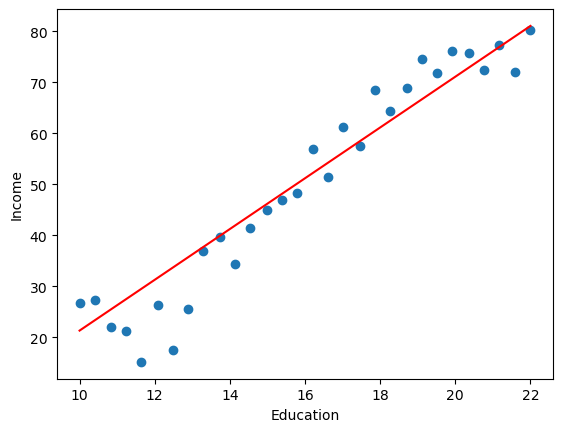

In [12]:
# 绘制拟合曲线
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')
plt.plot(X, model(X).data.numpy(), color='red')

***

## 分解写法

In [13]:
# 初始化参数w(权重)和b(偏置)
w = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w)
print(b)

tensor([0.5789], requires_grad=True)
tensor([0.], requires_grad=True)


模型公式：`Y = w * X + b`

In [14]:
learning_rate = 0.0001 # 学习率
for epoch in range(5000):
    for x, y in zip(X, Y):
        # 前向传播，计算模型输出
        y_pred = torch.matmul(x, w) + b # torch.matmul()表示矩阵乘法
        # 计算损失，即真实值与预测值之间的均方误差
        loss = (y - y_pred).pow(2).mean() # .pow(2)表示平方，.mean()表示求均值
        # 梯度清零
        if w.grad is not None:
            w.grad.data.zero_()
        if b.grad is not None:
            b.grad.data.zero_()
        # 反向传播，计算梯度
        loss.backward()
        # 更新参数，使参数沿着梯度的反方向移动，从而使损失最小
        with torch.no_grad():
            w.data -= learning_rate * w.grad.data
            b.data -= learning_rate * b.grad.data
    if (epoch+1) % 1000 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch+1, 5000, loss.item()))

Epoch[1000/5000], loss: 10.189896
Epoch[2000/5000], loss: 2.913956
Epoch[3000/5000], loss: 0.343582
Epoch[4000/5000], loss: 0.067506
Epoch[5000/5000], loss: 0.806971


In [15]:
# 查看模型的参数，即w和b
print(w, b)

tensor([4.9748], requires_grad=True) tensor([-28.3745], requires_grad=True)


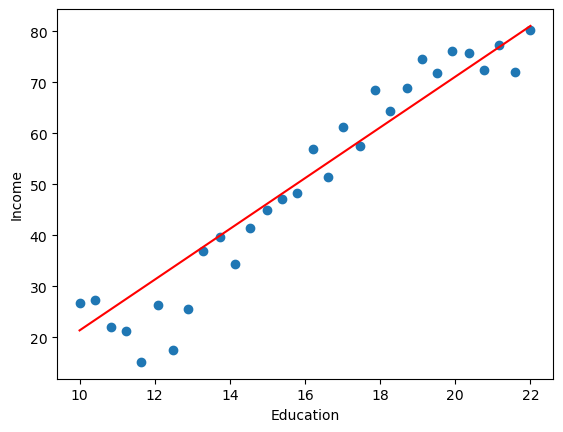

In [16]:
# 绘制拟合曲线
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')
plt.plot(X.numpy(), (w*X + b).data.numpy(), color='red')